<a href="https://colab.research.google.com/github/Leonatr/Programming/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_0_7_0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ссылка на материалы:  [пдф тут](https://drive.google.com/file/d/16Cm2tgrpuDH8eIdxdSYyOsfDPqnJ3byd/view?usp=sharing)

ФИО:

In [ ]:
Леонов Илья Сергеевич

## Задание 1. HTTP-запросы, ответы и погода

Описание:

Напишите HTTP-запрос для получения информации о погоде в введенном городе из API.

Можно использовать API: https://open-meteo.com/. Используйте метод GET.


Ввод
```
56.50, 60.35
```

Вывод
```
Сегодня (1.11) погода 20 ◦С, нет осадков, туман
```





In [ ]:
import requests
from datetime import datetime


def send_request(url):
  response = requests.get(url)

  status_code = response.status_code
  if status_code == 200:
    return response.json()
  return None


def clear_data(data):
  current_date = datetime.today().date()
  current_date = f'{current_date.day}.{current_date.month}'

  #Получение температуры
  temperature = data['current']['temperature_2m']
  temperature_format = data['current_units']['temperature_2m']

  weather_code = ['current']['weather_code']

  if weather_code in [0, 1]:
    weather = 'нет осадков, ясно'
  elif weather_code == 45:
      weather = 'нет осадков, туман'
  elif weather_code in [61, 63, 65, 71, 73, 75]:
      weather = 'осадки, нет тумана'
  else:
    weather = 'выгляни в окно и посмотри сам'

  message = f'Сегодня {current_date} погода {temperature}, {temperature_format}, {weather}'

  return message


def main():
  coordinates = input('Введите ваши координаты: ').split(', ')
  url = f'https://api.open-meteo.com/v1/forecast?latitude={coordinates[0]}.5&longitude={coordinates[1]}.35&current=temperature_2m,weather_code&forecast_days=1'
  data = send_request(url)
  message = clear_data(data)
  print(message)


main()


In [ ]:
import requests
from datetime import datetime


# функция отправки запроса
def send_request(url):
    response = requests.get(url)

    status_code = response.status_code
    if status_code == 200:
        return response.json()
    return None

# функция очистки данных
def clear_data(data):
    # получение текущей даты
    current_date = datetime.today().date()
    current_date = f'{current_date.day}.{current_date.month}'

    # получение температуры
    temperature = data['current']['temperature_2m']
    temperature_format = data['current_units']['temperature_2m']

    # получение кода температуры
    weather_code = data['current']['weather_code']

    # определение погоды по коду
    if weather_code in [0, 1]:
        weather = 'нет осадков, ясно'
    elif weather_code == 45:
        weather = 'нет осадков, туман'
    elif weather_code in [61, 63, 65 ,71 ,73, 75]:
        weather = 'осадки, нет тумана'
    else:
        weather = 'выгляни в окно и посмотри сам'

    # формирование сообщения
    message = f'Сегодня ({current_date}) погода {temperature} {temperature_format}, {weather}'

    return message


# основная функция
def main():
    coordinates = input('Введите ваши координаты').split(', ')
    url = f'https://api.open-meteo.com/v1/forecast?latitude={coordinates[0]}&longitude={coordinates[1]}&current=temperature_2m,weather_code&forecast_days=1'
    data = send_request(url)
    message = clear_data(data)
    print(message)


main()



Введите ваши координаты56.50, 60.35
Сегодня (31.10) погода 2.0 °C, нет осадков, ясно


## Задание 2. HTTP-запросы, ответы и покемоны

**Описание:**


Создайте код программы, которая будет взаимодействовать с API, со следующим функионалом:

1. Используя метод GET, отправьте запрос на endpoint /pokemon, чтобы получить список первых 20 покемонов

2. Извлеките имена покемонов из ответа и выведите их списком

3. Введите с помощью input() название одного из покемонов


```
Имя покемона: clefairy
```



4. Отправьте GET-запрос, чтобы получить полную информацию о выбранном покемоне

5. Извлеките и выведите следующие данные о введенном покемоне:

     • Имя

     • Тип

     • Вес

     • Рост

     • Способности

Используйте PokéAPI (https://pokeapi.co/), который предоставляет информацию о покемонах, их характеристиках, типах и другую информацию.

In [ ]:
import requests


def send_request(url):
    response = requests.get(url)
    status_code = response.status_code
    if status_code == 200:
        return response.json()
    return None

names = []
for num in range(1, 21):
  url = f'https://pokeapi.co/api/v2/pokemon/{num}/'
  data = send_request(url)
  names.append(data['name'])

print(names)

name = input('Введите имя покемона: ')
url = f'https://pokeapi.co/api/v2/pokemon/{name}/'
data = send_request(url)

print('Имя покемона:', data['name'])

types = data['types']
for tipe in types:
  for k,v in tipe.items():
    if k == 'type':
      print('Тип покемона:', v['name'])

print('Вес покемона:',data['weight'])
print('Рост покемона:',data['height'])

abilities = data['abilities']
all_abilities = []

for ability in abilities:
  for k,v in ability.items():
    if k == 'ability':
      all_abilities.append(v['name'])

print('Способности покемона:', all_abilities)

['bulbasaur', 'ivysaur', 'venusaur', 'charmander', 'charmeleon', 'charizard', 'squirtle', 'wartortle', 'blastoise', 'caterpie', 'metapod', 'butterfree', 'weedle', 'kakuna', 'beedrill', 'pidgey', 'pidgeotto', 'pidgeot', 'rattata', 'raticate']


## Задание 3. HTTP-запросы, ответы и посты

**Описание:**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API, реализуя следующие функции:

1. Реализуйте функцию, которая выполняет GET-запрос к https://jsonplaceholder.typicode.com/posts и возвращает список постов в формате JSON

2. Реализуйте функцию, котороая получает вводимое ID поста, выполняет GET-запрос по ID и возвращает данные поста в формате JSON

3. Реализуйте функцию, которая выполняет обработку JSON из пункта 2 и выводит всю важную информацию в консоль

In [ ]:
import requests


def post_id():
    post_id = int(input('Введите id поста: '))

    url = f'https://jsonplaceholder.typicode.com/posts/{post_id}'
    return url


def send_request():
    response = requests.get(post_id())
    status_code = response.status_code

    if status_code == 200:
        return response.json()
    return None


def important_information():
    data = send_request()

    for k, v in data.items():
        if k == 'title':
            print(f'\nTitle: {v}')
        if k == 'body':
            print(f'Body: {v}')


important_information()

Введите id поста: 34

Title: magnam ut rerum iure
Body: ea velit perferendis earum ut voluptatem voluptate itaque iusto
totam pariatur in
nemo voluptatem voluptatem autem magni tempora minima in
est distinctio qui assumenda accusamus dignissimos officia nesciunt nobis


## Задание 4. HTTP-запросы, ответы и работа с постами

**Описание**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API (из предыдущего задания), реализуя новые функции:

1. Реализуйте функцию, которая принимает заголовок, содержимое и ID пользователя (информация вводится с помощью input()), выполняет POST-запрос для создания нового поста и возвращает информацию о созданном посте в формате JSON


```
Заголовок: Новый пост
Содержимое поста: Тут должно находиться содержимое нового поста...
ID пользователя: 10
```



2. Реализуйте функцию, которая принимает ID поста, новый заголовок и новое содержимое, выполняет PUT-запрос и возвращает обновлённый пост в формате JSON

3. Реализуйте функцию, которая принимает ID поста, выполняет DELETE-запрос и возвращает статус-код ответа

In [ ]:
import requests


def post_request(url):
    heading = input('Заголовок: ')
    dictionary1['title'] = heading

    post_content = input('Содержимое поста: ')
    dictionary1['body'] = post_content

    user_id = input('ID пользователя: ')
    dictionary1['userId'] = user_id


    response = requests.post(url, dictionary1)
    status_code = response.status_code

    if status_code in [200, 201] :
        return response.json()
    return None


def put_request(url):
    main_id = input('Введите id заголовка: ')

    heading = input('Заголовок: ')
    dictionary2['title'] = heading

    post_content = input('Содержимое поста: ')
    dictionary2['body'] = post_content

    user_id = input('ID пользователя: ')
    dictionary2['userId'] = user_id

    respon = requests.put(f'https://jsonplaceholder.typicode.com/posts/{main_id}', dictionary2)
    status_code = respon.status_code

    if status_code in [200, 201]:
        return respon.json()
    return None


def delete_request(url):
    main_id = input('Введите id поста: ')
    response = requests.delete(f'https://jsonplaceholder.typicode.com/posts/{main_id}')
    status_code = response.status_code

    if status_code in [200, 201]:
        return 'Пост успешно удалён'
    return None

dictionary1 = {}
dictionary2 = {}
new_post = []
url = 'https://jsonplaceholder.typicode.com/posts'

data = post_request(url)
for k,v in data.items():
    if k == 'id':
        id = v

print(data)
print(put_request(url))
print(delete_request(url))

Заголовок: 1
Содержимое поста: 1
ID пользователя: 1
{'title': '1', 'body': '1', 'userId': '1', 'id': 101}
Введите id заголовка: 1
Заголовок: 1
Содержимое поста: 1
ID пользователя: 1
{'title': '1', 'body': '1', 'userId': '1', 'id': 1}
Введите id поста: 1
Пост успешко удалён


## Задание 5. HTTP-запросы, ответы и пёсики

**Описание**

Создайте программу, которая будет взаимодействовать с Dog API, которая позволит получать список пород собак, вводить несколько пород и получать их фотогрфии.

Этапы:

1. Создайте функцию, которая использует метод GET и возвращает список всех пород собак в формате нумерованного списка

2. Реализуйте возможность ввода нескольких пород собак через запятую


```
african, chow, dingo
```



3. Создание функции, которая реализует запрос, возвращает и выводит изображениия собак, породы которых были введены до этого


Используйте Dog API (https://dog.ceo/dog-api/), который предоставляет информацию о породах собак и их изображения.


*Подсказка*



```
import requests
from PIL import Image
from IPython.display import display
import io

url = <____>
response = <____>
        
if response.<______> == <___>:
      image_url = response.json()['message']

res = requests.<__>(image_url)
img = Image.open(io.BytesIO(res.content))
display(img)
```



Введите породы собак: bulldog
Порода собаки: bulldog


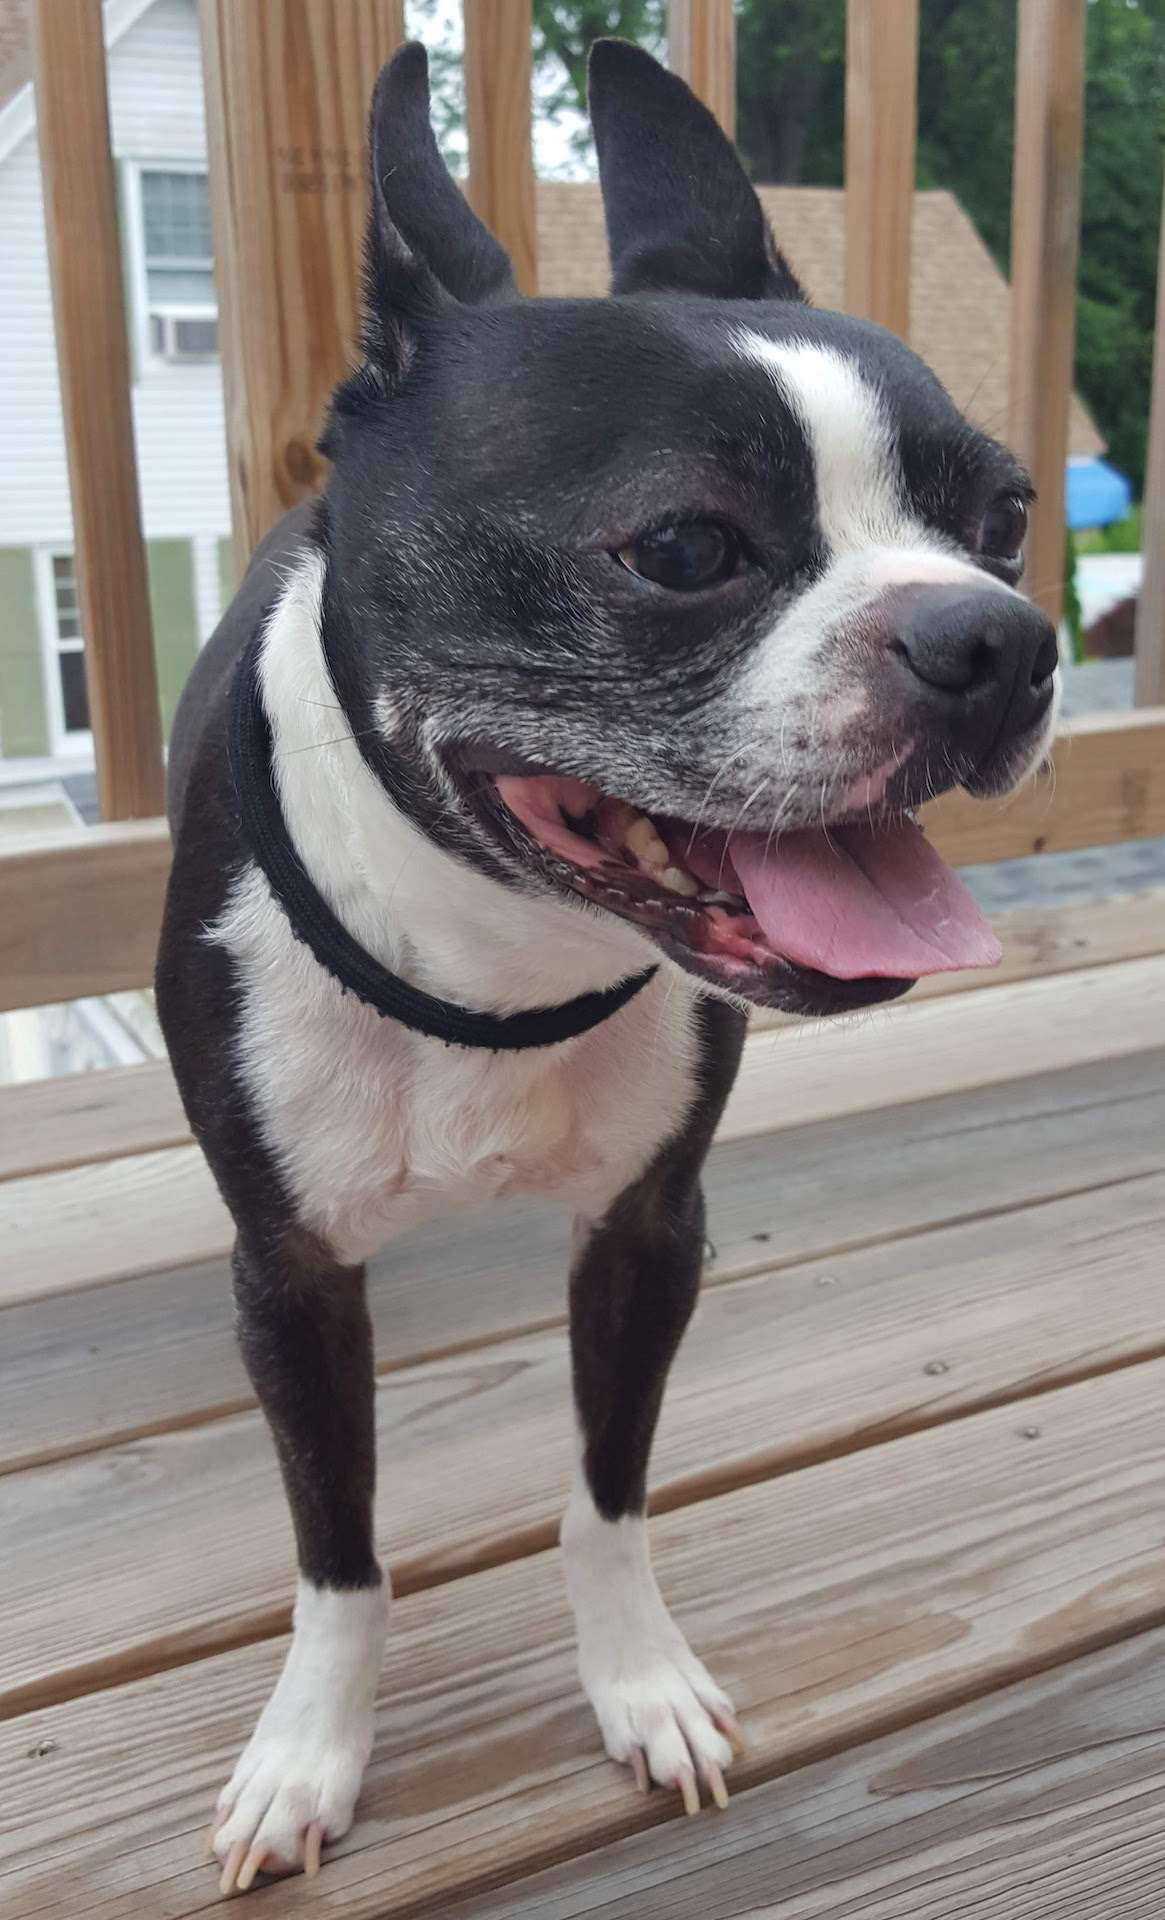

In [ ]:
import requests
from PIL import Image
from IPython.display import display
import io

def dog_breeds(url):
    respon = requests.get(url)
    status_code = response.status_code

    if status_code in [200, 201]:
        return respon.json()
    return None

url = 'https://dog.ceo/api/breeds/list/all'
data = dog_breeds(url)
all_breeds = {}
number = 0

for v in data.values():
    if type(v) == dict:
        for k in v.keys():
            number+=1
            all_breeds[number] = k

breeds = input('Введите породы собак: ').split(', ')

for key, val in all_breeds.items():
    if val in breeds:
        print(f'Порода собаки: {val}')
        url = f'https://dog.ceo/api/breed/{val}/images'
        response = requests.get(url)

        if response.status_code in [200, 201]:
              image_url = response.json()['message'][0]

        res = requests.get(image_url)
        img = Image.open(io.BytesIO(res.content))
        display(img)